<a href="https://colab.research.google.com/github/Molzard/PCVK-Ganjil-2025/blob/main/Week12_PCVK_Kelompok4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---


<p align="center">Pertemuan Ke 12</p>


---



In [ ]:
from google.colab import userdata
import os

try:
  os.environ["KAGGLE_KEY"] = userdata.get('KAGGLE_KEY')
  os.environ["KAGGLE_USERNAME"] = userdata.get('KAGGLE_USERNAME')
except Exception as e:
  print(e)

!kaggle datasets download -d moltean/fruits

Dataset URL: https://www.kaggle.com/datasets/moltean/fruits
License(s): CC-BY-SA-4.0
100% 4.54G/4.54G [01:13<00:00, 234MB/s]
100% 4.54G/4.54G [01:13<00:00, 66.5MB/s]


In [ ]:
# Extract Dataset
import zipfile
from tqdm import tqdm

zip_path = "fruits.zip"
extract_path = "fruits360"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    total_files = len(zip_ref.infolist())
    with tqdm(total=total_files, desc='Extracting') as pbar:
        for file in zip_ref.infolist():
            zip_ref.extract(file, extract_path)
            pbar.update(1)


Extracting: 100%|██████████| 280456/280456 [01:26<00:00, 3255.02it/s]


In [ ]:
import os, random, cv2
import pandas as pd
import matplotlib.pyplot as plt
import difflib
import numpy as np
from collections import Counter

base_path = "/content/fruits360/fruits-360_original-size/fruits-360-original-size"
train_path = os.path.join(base_path, "Training")
test_path  = os.path.join(base_path, "Test")

# Cek apakah base_path ada
print("base_path exists:", os.path.exists(base_path))
print("train_path exists:", os.path.exists(train_path))
print("test_path  exists:", os.path.exists(test_path))

base_path exists: True
train_path exists: True
test_path  exists: True


In [ ]:
# Lihat 20 nama folder pertama di Training
print(os.listdir(train_path)[:20])

['carrot_1', 'Quince 3', 'Cucumber 11', 'apple_red_yellow_1', 'apple_red_2', 'Gooseberry 1', 'Pear 9', 'Cucumber 3', 'Nut 3', 'Nut 2', 'Tomato Cherry Orange 1', 'Banana 4', 'Peach 5', 'apple_red_3', 'Avocado Black 1', 'Tomato 10', 'Cherry Wax not ripen 1', 'zucchini_dark_1', 'Cherry 3', 'Blackberrie 1']


In [ ]:
# Filter kelas sesuai tema
all_train_cls = set(os.listdir(train_path))

sayuran = [
    "Cabbage red 1", "Carrot 1", "Onion Red 1", "Onion White 1", "Tomato 1", "cabbage_white_1", "eggplant_long_1"
]

tropis = [
    "Banana 3", "Avocado Black 1", "Cactus fruit green"
]

selected_classes = []

# Memilih 10 Kelas
wanted = sayuran[:7] + tropis[:3]

# Pencocokan
for w in wanted:
    m = difflib.get_close_matches(w, all_train_cls, n=1, cutoff=0.55)
    if m:
        selected_classes.append(m[0])
    else:
        print(f"⚠️  {w} tidak ditemukan → dilewatkan")

print("Jumlah kelas :", len(selected_classes))
print("Daftar kelas :", selected_classes)

Jumlah kelas : 10
Daftar kelas : ['Cabbage red 1', 'carrot_1', 'Onion Red 2', 'Onion White Peeled 1', 'Tomato 1', 'cabbage_white_1', 'eggplant_long_1', 'Banana 3', 'Avocado Black 1', 'Cactus fruit green 1']


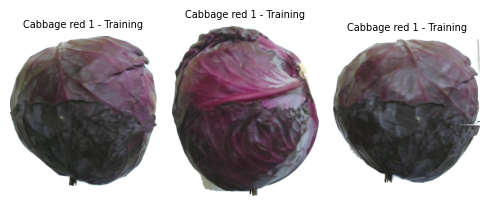

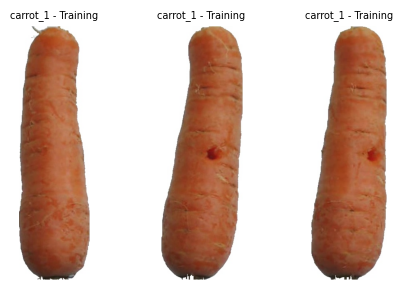

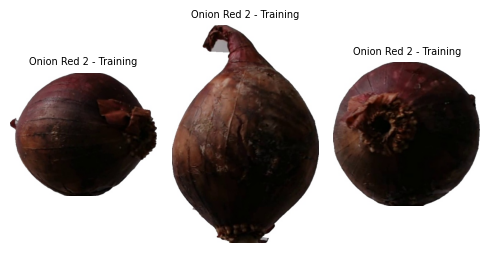

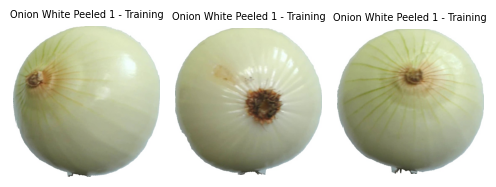

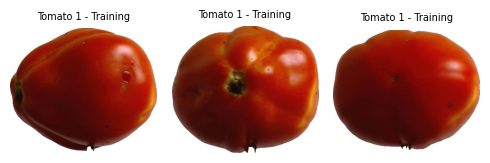

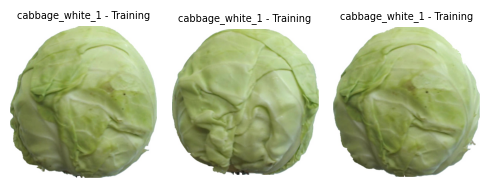

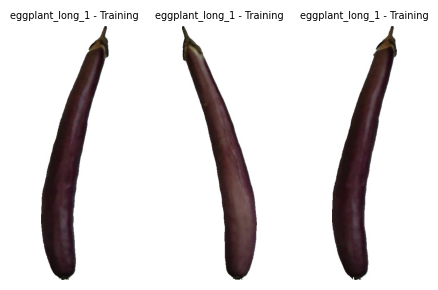

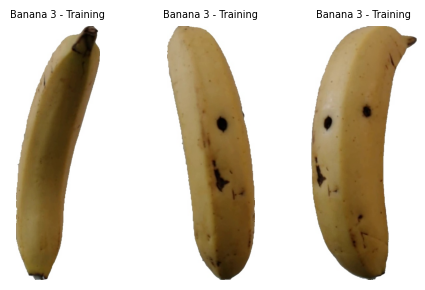

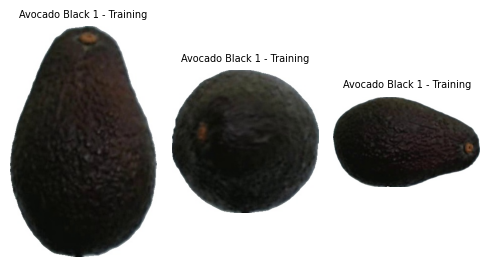

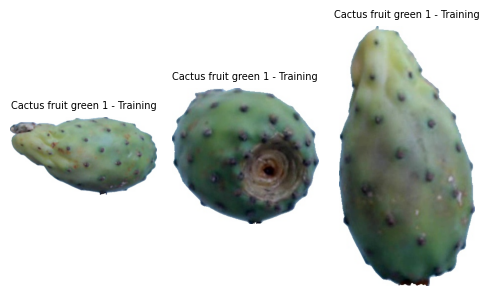

In [ ]:
# Fungsi membaca dan menampilkan citra

def load_random_images(class_name, split="Training", n=3):
    class_path = os.path.join(base_path, split, class_name)
    if not os.path.exists(class_path):
        return []
    images = random.sample(os.listdir(class_path), min(n, len(os.listdir(class_path))))
    return [cv2.cvtColor(cv2.imread(os.path.join(class_path, img)), cv2.COLOR_BGR2RGB) for img in images]

def plot_images(class_name, split="Training"):
    images = load_random_images(class_name, split, n=3)
    plt.figure(figsize=(5, 3))
    for i, img in enumerate(images):
        plt.subplot(1, 3, i+1)
        plt.imshow(img)
        plt.title(f"{class_name} - {split}", fontsize=7)
        plt.axis("off")
    plt.tight_layout()
    plt.show()

# Menampilkan 10 Kelas
for cls in selected_classes:
    plot_images(cls, "Training")

In [ ]:
# Hitung jumlah data training & testing

def count_images(class_name):
    train_cls_path = os.path.join(train_path, class_name)
    test_cls_path = os.path.join(test_path, class_name)
    train_count = len(os.listdir(train_cls_path)) if os.path.exists(train_cls_path) else 0
    test_count = len(os.listdir(test_cls_path)) if os.path.exists(test_cls_path) else 0
    return train_count, test_count

summary = {}
total_train = 0
total_test = 0

for cls in selected_classes:
    tr, te = count_images(cls)
    summary[cls] = {"Training": tr, "Test": te}
    total_train += tr
    total_test += te

# Tambahkan baris total
summary["-"*20] = {"Training": "----------", "Test": "----------"}
summary["TOTAL"] = {"Training": total_train, "Test": total_test}

df = pd.DataFrame(summary).T
print(df)

                        Training        Test
Cabbage red 1                 99          49
carrot_1                     101          50
Onion Red 2                  480         237
Onion White Peeled 1         206         102
Tomato 1                     435         216
cabbage_white_1               96          47
eggplant_long_1              160          80
Banana 3                     154          77
Avocado Black 1              468         231
Cactus fruit green 1         465         231
--------------------  ----------  ----------
TOTAL                       2664        1320


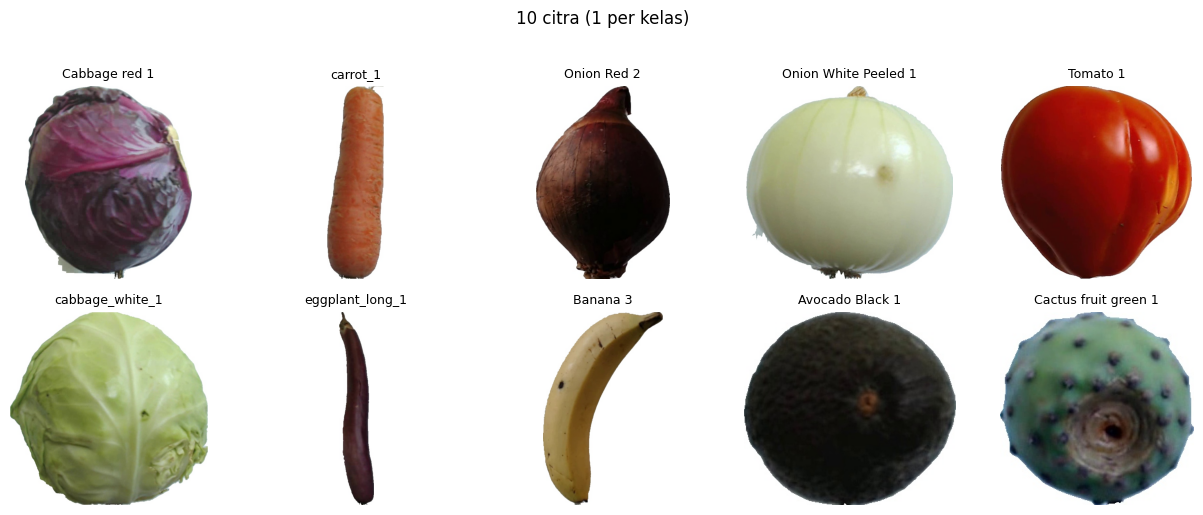


Ringkasan kualitas citra (resolusi & kecerahan):
                            file height width resolution brightness
Cabbage red 1           r1_0.jpg    762   660    660×762      133.8
carrot_1               r0_66.jpg    666   195    195×666      172.2
Onion Red 2           r0_206.jpg    578   402    402×578      117.1
Onion White Peeled 1   r0_64.jpg    662   709    709×662      199.2
Tomato 1              r0_256.jpg    475   470    470×475      162.4
cabbage_white_1        r0_86.jpg    758   776    776×758      181.3
eggplant_long_1        r0_50.jpg    634   112    112×634      139.1
Banana 3                r0_2.jpg    828   512    512×828      206.1
Avocado Black 1       r2_238.jpg    294   323    323×294       83.2
Cactus fruit green 1  r1_128.jpg    279   280    280×279      136.4


In [ ]:
# 10 CITRA + ANALISIS

import cv2, math, pandas as pd, matplotlib.pyplot as plt

sample = {}          # akan menyimpan nama file, resolusi, brightness
images   = []        # untuk ditampilkan
labels   = []

for cls in selected_classes:
    cls_dir = os.path.join(train_path, cls)
    if not os.path.isdir(cls_dir):
        print(f"⚠️  folder {cls} tidak ditemukan – dilewatkan")
        continue
    # ambil 1 file gambar secara acak
    files = [f for f in os.listdir(cls_dir) if f.lower().endswith(('.png','.jpg','.jpeg'))]
    if not files:
        print(f"⚠️  tidak ada file gambar di {cls}")
        continue
    fname = random.choice(files)
    fpath = os.path.join(cls_dir, fname)

    bgr  = cv2.imread(fpath)
    rgb  = cv2.cvtColor(bgr, cv2.COLOR_BGR2RGB)
    h, w = rgb.shape[:2]

    # kecerahan = rata-rata nilai V (HSV)
    hsv   = cv2.cvtColor(rgb, cv2.COLOR_RGB2HSV)
    brightness = hsv[:,:,2].mean()

    sample[cls] = {"file": fname, "height": h, "width": w,
                   "resolution": f"{w}×{h}", "brightness": round(brightness, 1)}
    images.append(rgb)
    labels.append(cls)

# Tampilkan gambar
n = len(images)
cols = 5
rows = math.ceil(n / cols)
fig, axs = plt.subplots(rows, cols, figsize=(cols*2.5, rows*2.5))
if rows == 1: axs = axs.reshape(1, -1)
axs = axs.flatten()

for i, (img, lbl) in enumerate(zip(images, labels)):
    axs[i].imshow(img)
    axs[i].set_title(lbl, fontsize=9)
    axs[i].axis('off')

# Kosongkan axis yang tidak terpakai
for j in range(i+1, len(axs)):
    axs[j].axis('off')

plt.suptitle("10 citra (1 per kelas)", y=1.02)
plt.tight_layout()
plt.show()

# Tabel analisis
df_analysis = pd.DataFrame(sample).T
print("\nRingkasan kualitas citra (resolusi & kecerahan):")
print(df_analysis)

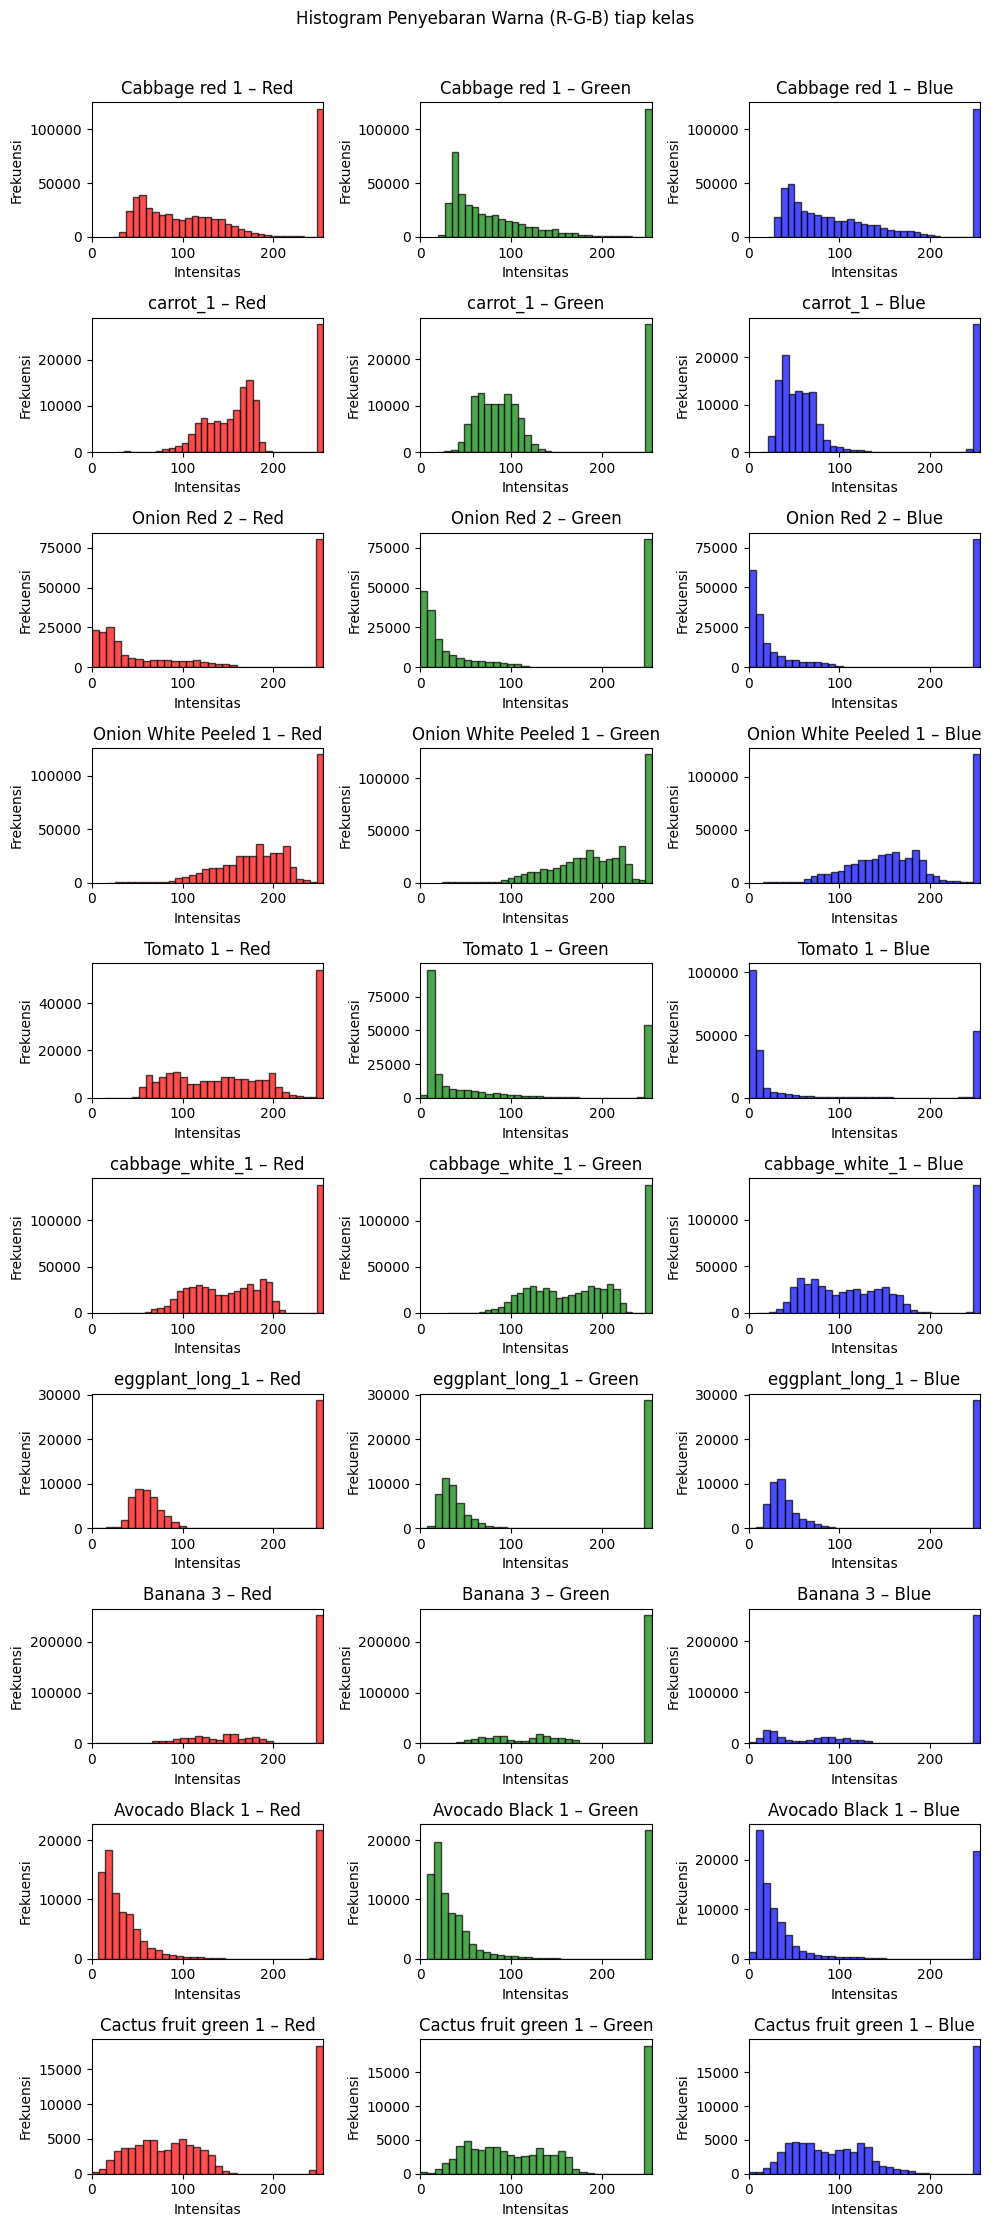

In [ ]:
# HISTOGRAM PENYEBARAN WARNA (R-G-B) per kelas

fig, axes = plt.subplots(nrows=len(images), ncols=3, figsize=(10, 2.2*len(images)))
if len(images) == 1:          # jaga-jaga hanya 1 kelas
    axes = axes.reshape(1, -1)

for idx, (img, cls) in enumerate(zip(images, labels)):
    # pisahkan channel
    r, g, b = cv2.split(img)

    # plot R, G, B
    for ch, ax, col, label in zip([r, g, b], axes[idx], ['r', 'g', 'b'], ['Red', 'Green', 'Blue']):
        ax.hist(ch.ravel(), bins=32, color=col, alpha=0.7, edgecolor='black')
        ax.set_title(f"{cls} – {label}")
        ax.set_xlim([0, 255])
        ax.set_xlabel("Intensitas")
        ax.set_ylabel("Frekuensi")

# hilangkan axis yang tidak terpakai (kalau ada)
for j in range(idx+1, len(axes)):
    for ax in axes[j]:
        ax.axis('off')

plt.suptitle("Histogram Penyebaran Warna (R-G-B) tiap kelas", y=1.01)
plt.tight_layout()
plt.show()

Noise & tingkat ke-tajaman alamiah per kelas:
                  Kelas  Noise (σ V)  Sharpness  
0         Cabbage red 1        76.98          147
1              carrot_1        50.26          832
2           Onion Red 2        95.74          662
3  Onion White Peeled 1        45.62          150
4              Tomato 1        66.26          626
5       cabbage_white_1        52.63          205
6       eggplant_long_1        89.65         1345
7              Banana 3        61.78          308
8       Avocado Black 1        99.62          543
9  Cactus fruit green 1        69.73          354


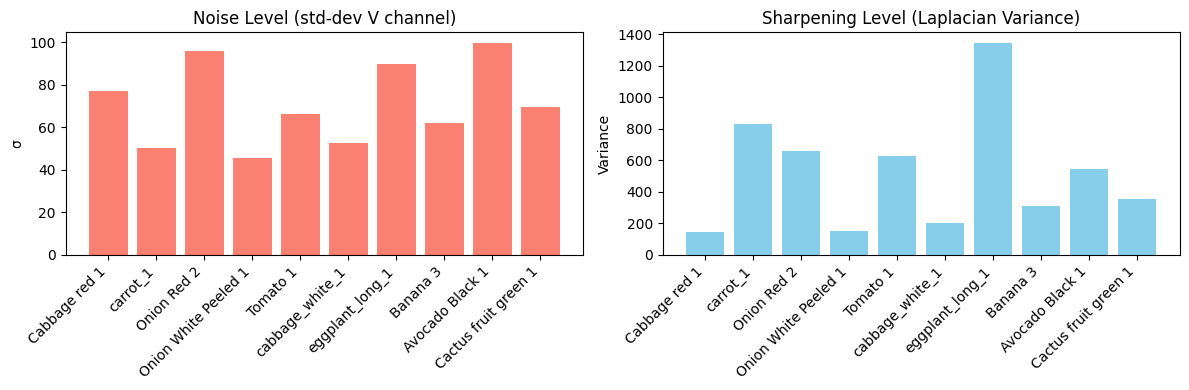

In [ ]:
# DETEKSI NOISE & TINGKAT KE-TAJAMAN (sharpening alamiah)

noise_scores   = []   # std dev channel V
sharp_scores   = []   # variance Laplacian
labels_        = []

random.seed(42)

for cls in selected_classes:
    cls_dir = os.path.join(train_path, cls)
    files   = [f for f in os.listdir(cls_dir) if f.lower().endswith(('.png','.jpg','.jpeg'))]
    fname   = random.choice(files)
    fpath   = os.path.join(cls_dir, fname)

    bgr = cv2.imread(fpath)
    gray = cv2.cvtColor(bgr, cv2.COLOR_BGR2GRAY)

    # 1. Noise: standar deviasi channel V (HSV)
    hsv = cv2.cvtColor(bgr, cv2.COLOR_BGR2HSV)
    noise = hsv[:, :, 2].std()

    # 2. Sharpening alamiah: variance of Laplacian
    lap = cv2.Laplacian(gray, cv2.CV_64F)
    sharp = lap.var()

    noise_scores.append(noise)
    sharp_scores.append(sharp)
    labels_.append(cls)

# Tabel
df_noise_sharp = pd.DataFrame({
    "Kelas"      : labels_,
    "Noise (σ V)": np.round(noise_scores, 2),
    "Sharpness  ": np.round(sharp_scores, 0).astype(int)
})
print("Noise & tingkat ke-tajaman alamiah per kelas:")
print(df_noise_sharp)

# Visualisasi
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

# Noise
ax[0].bar(labels_, noise_scores, color='salmon')
ax[0].set_title("Noise Level (std-dev V channel)")
ax[0].set_ylabel("σ")
plt.setp(ax[0].get_xticklabels(), rotation=45, ha='right')

# Sharpening
ax[1].bar(labels_, sharp_scores, color='skyblue')
ax[1].set_title("Sharpening Level (Laplacian Variance)")
ax[1].set_ylabel("Variance")
plt.setp(ax[1].get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()